In [217]:
from tqdm import tqdm
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import urllib
import time
from selenium.webdriver.common.keys import Keys
import lxml
import requests
import base64
import json
import pandas as pd
import numpy as np
import urllib.request
from fake_useragent import UserAgent
from bs4 import BeautifulSoup 
from selenium.webdriver.common.action_chains  import ActionChains
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Ну че пацаны, визуал
поскольку табличку с данными о музыке по странам пока не залили, потренируемся на countries.csv

In [218]:
#Просто словарик с кодами стран. И нет, я составлял его не вручную
codes = {'Australia': 'AUS',
'Austria':'AUT',
'Argentina': 'ARG',
 'Belgium': 'BEL',
 'Brazil': 'BRA',
 'United Kingdom': 'GBR',
 'Hungary': 'HUN',
 'Vietnam': 'VNM',
 'Guatemala': 'GTM',
 'Germany': 'DEU',
 'Hong Kong': 'HKG',
 'Denmark': 'DNK',
 'Dominican Republic': 'DOM',
 'Egypt': 'EGY',
 'Israel': 'ISR',
 'India': 'IND',
 'Indonesia': 'IDN',
 'Ireland': 'IRL',
 'Spain': 'ESP',
 'Italy': 'ITA',
 'Canada': 'CAN',
 'Colombia': 'COL',
 'Malaysia': 'MYS',
 'Morocco': 'MAR',
 'Mexico': 'MEX',
 'Netherlands': 'NLD',
 'New Zealand': 'NZL',
 'Norway': 'NOR',
 'UAE': 'ARE',
 'Panama': 'PAN',
 'Peru': 'PER',
 'Poland': 'POL',
 'South Korea': 'KOR',
 'Russia': 'RUS',
 'Romania': 'ROU',
 'Saudi Arabia': 'SAU',
 'Singapore': 'SGP',
 'Slovakia': 'SVK',
 'USA': 'USA',
 'Thailand': 'THA',
 'Taiwan': 'TWN',
 'Turkey': 'TUR',
 'Ukraine': 'UKR',
 'Philippines': 'PHL',
 'Finland': 'FIN',
 'Czech Republic': 'CZE',
 'Chile': 'CHL',
 'Switzerland': 'CHE',
 'Sweden': 'SWE',
 'Ecuador': 'ECU',
 'South Africa': 'ZAF',
 'Japan': 'JPN'}

In [219]:
positions = pd.read_csv("positions 2.csv")
allsongs = pd.read_csv("allsongs.csv")
countries = pd.read_csv("countries 2.csv")
complete = pd.read_csv("complete.csv")

In [220]:
countries = countries[1:] #убираем global

#### Добавляем колонку с кодами стран. Она нужна, чтобы коректно работала карта

In [221]:
newcolumn = []
for i in countries['country']:
    newcolumn.append(codes[i])

countries.insert(1, 'CODE', newcolumn)
countries

,country,CODE,id,followers
1,Australia,AUS,37i9dQZEVXbK4fwx2r07XW,11468
2,Austria,AUT,37i9dQZEVXbM1EaZ0igDlz,1449
3,Argentina,ARG,37i9dQZEVXbKPTKrnFPD0G,10444
4,Belgium,BEL,37i9dQZEVXbND4ZYa46PaA,2309
5,Brazil,BRA,37i9dQZEVXbKzoK95AbRy9,49584
6,United Kingdom,GBR,37i9dQZEVXbMwmF30ppw50,22726
7,Hungary,HUN,37i9dQZEVXbMYsavqzfk6k,927
8,Vietnam,VNM,37i9dQZEVXbKZyn1mKjmIl,3844
9,Guatemala,GTM,37i9dQZEVXbJHSzlHx2ZJU,654
10,Germany,DEU,37i9dQZEVXbK8BKKMArIyl,25656


In [231]:
fig = go.Figure(data=go.Choropleth(
    locations = countries['CODE'],
    z = countries['followers'],
    text = countries['country'],
    colorscale = 'Greens', #если хочется немного hse style, можно установить Rainbow или хотя бы Blues
    autocolorscale=False,
    reversescale= False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'фолловеры',
    
))


fig.update_layout(
    #title_text='фолловеры',
    geo=dict(
        #showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

'''fig.update_layout(
    autosize=False,
    width=1000,
    height=700,)'''

fig.show()


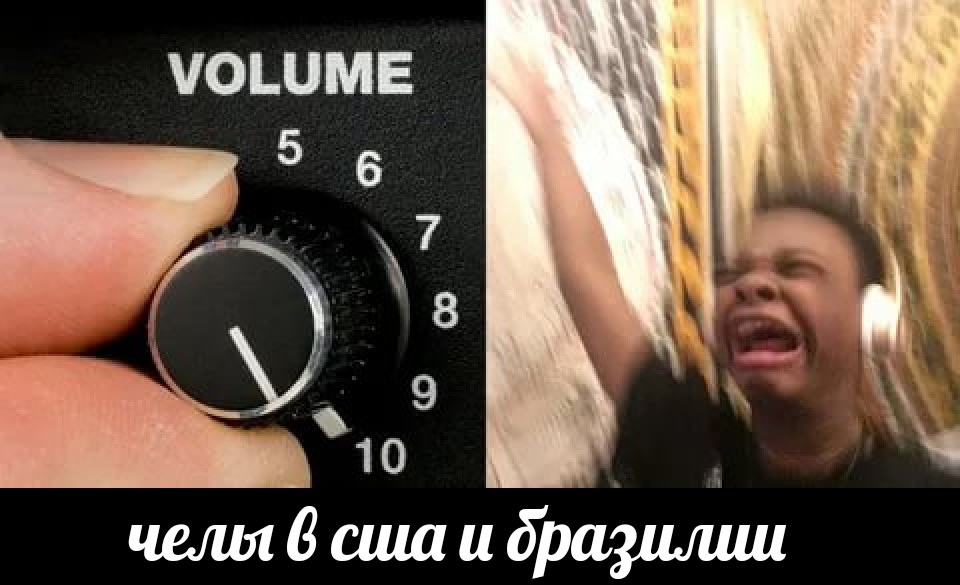